# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [39]:
def drawGraph(centroids, clusters, nrOfCentroids):
    # 
    #
    #
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.figure()
    for i in range(nrOfCentroids):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % len(colors)], marker='.')
        plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')


def calculateCost(centroids, clusters, totalPoints):
    totalSum = 0.0
    for cluster in clusters:
        totalSum += ((np.linalg.norm(clusters[cluster] - centroids[cluster])) ** 2)
    return totalSum / totalPoints


def createClusters(data, centroids, nrOfCentroids):
    clusters = {}
    for i in range(nrOfCentroids):
        clusters[i] = []
    for d in data:
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(d - centroid))
        nrOfCluster = distances.index(min(distances))
        clusters[nrOfCluster].append(d)
    return clusters

def createCentroids(data, centroids):
    start = np.random.randint(len(data) - centroids - 1)
    end = start + centroids
    return data[start:end]


def moveCentroids(centroids, clusters):
    for cluster in clusters:
        averaged = np.average(clusters[cluster], axis=0)
        centroids[cluster] = averaged
    return centroids


def kmeansClustering(data, centroids=3, kmeansExecutions=60, shiftsForExecution=30):
    # Takes:
    # double array of n dimensional points, 
    # amount of centroids (int,), 
    # number of executions of the k-means clutering (int), 
    # number of centroid shifts for each k-means execution(int).
    # 
    # Does:
    # Exectues the k-means clutering a specified number of times and returns centrids, clusters 
    # and cost value of the most effective clustering of given data.
    #
    # Returns:
    # centroids - n dimensional double array containing coordinates of the centriods,
    # clusters  - Dictionary coitaining cluster number paired with n dimensional double array containing points coordinates,
    # cost      - double value of the cost funtion (the less the better).

    
    costFinal = np.inf   
    # Sets default cost value to infinite

    for i in range(kmeansExecutions):
    # Does the k-means clustering a specified number of times

        centroidsTemp = createCentroids(data, centroids)
        # Creates first centroids

        for x in range(shiftsForExecution):
            clustersTemp = createClusters(data, centroidsTemp, centroids)
            centroidsTemp = moveCentroids(centroidsTemp, clustersTemp)
            # Maches points to the centroids and then recalculates the centroids
            # a specified number of times

        costTemp = calculateCost(centroidsTemp, clustersTemp, len(data))
        # Calculates the cost value for the current centroids

        if costTemp < costFinal:
            print(f'i: {i}, {costTemp < costFinal}, {costTemp}')
            costFinal = costTemp
            centroidsFinal = centroidsTemp
            clustersFinal = clustersTemp
        # If the cost is less than the cost previously obtained the parameters of clusters are beeing saved

    drawGraph(centroidsTemp, clustersTemp,nrOfCentroids)
    return centroidsFinal, clustersFinal, costFinal
    # Draws a graph and returns the results

In [40]:
#odpalanie dla limitów 100, 50
nrOfDimensions = 2
nrOfCentroids = 3
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km = kmeansClustering(points, nrOfCentroids)
#print('points: ', points)
#print('centroids: ', km[0])
#print('clusters: ', km[1])
print('cost: ', km[2])

i: 0, True, 0.3598189776035999
i: 2, True, 0.352980753545716
i: 4, True, 0.34845668002739094
i: 7, True, 0.33934172593872414
i: 8, True, 0.33872139027386916
i: 11, True, 0.3342108651688621
i: 13, True, 0.33345750716493083
i: 14, True, 0.32581215076204184
i: 17, True, 0.3181064076452142
i: 19, True, 0.3161475715228616
i: 20, True, 0.3126993459939259
i: 21, True, 0.3091615731085171
i: 22, True, 0.3077171091813527
i: 26, True, 0.29841572173711833
i: 29, True, 0.2959309761097329
i: 30, True, 0.29085075364168234
i: 31, True, 0.28030137922582704
i: 32, True, 0.2802144143964457
i: 33, True, 0.2770235175539856
i: 34, True, 0.2754665574027601
i: 36, True, 0.2753635569299789
i: 37, True, 0.2724714886385365
i: 38, True, 0.2718553002671147
i: 39, True, 0.2712481261495569
i: 40, True, 0.26362019646212365
i: 41, True, 0.26088852732186424
i: 42, True, 0.24902580472744787
i: 43, True, 0.24645165849642628
i: 44, True, 0.24470182879728572
i: 45, True, 0.24404719280321985
i: 46, True, 0.24144504219991494

limit1: 0, limit2: 9, cost: inf, costTemp: 0.5955469690201669
True
limit1: 1, limit2: 9, cost: 0.5955469690201669, costTemp: 0.591929187893305
True
limit1: 2, limit2: 9, cost: 0.591929187893305, costTemp: 0.5938180454638493
False
limit1: 3, limit2: 9, cost: 0.591929187893305, costTemp: 0.5901071648387834
True
limit1: 4, limit2: 9, cost: 0.5901071648387834, costTemp: 0.588821596155688
True
limit1: 5, limit2: 9, cost: 0.588821596155688, costTemp: 0.5873453938144425
True
limit1: 6, limit2: 9, cost: 0.5873453938144425, costTemp: 0.58549886401143
True
limit1: 7, limit2: 9, cost: 0.58549886401143, costTemp: 0.5798356160692903
True
limit1: 8, limit2: 9, cost: 0.5798356160692903, costTemp: 0.5737011435913563
True
limit1: 9, limit2: 9, cost: 0.5737011435913563, costTemp: 0.5728642425801316
True
limit1: 0, limit2: 9, cost: inf, costTemp: 0.36493469608537144
True
limit1: 1, limit2: 9, cost: 0.36493469608537144, costTemp: 0.3325129062166871
True
limit1: 2, limit2: 9, cost: 0.3325129062166871, cost

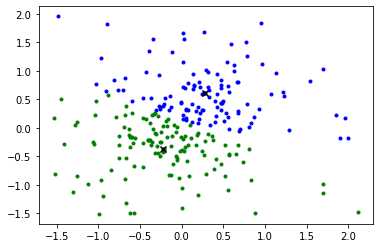

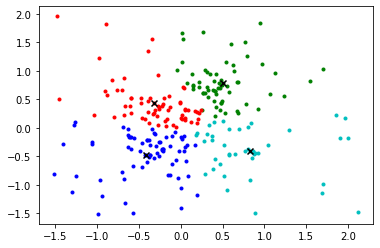

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 2
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids,  10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

limit1: 0, limit2: 9, cost: inf, costTemp: 0.30124915607404096
True
limit1: 1, limit2: 9, cost: 0.30124915607404096, costTemp: 0.29883811346237527
True
limit1: 2, limit2: 9, cost: 0.29883811346237527, costTemp: 0.2866957297447131
True
limit1: 3, limit2: 9, cost: 0.2866957297447131, costTemp: 0.2926781764118664
False
limit1: 4, limit2: 9, cost: 0.2866957297447131, costTemp: 0.28887150217494584
False
limit1: 5, limit2: 9, cost: 0.2866957297447131, costTemp: 0.27741156796177135
True
limit1: 6, limit2: 9, cost: 0.27741156796177135, costTemp: 0.2966484382424753
False
limit1: 7, limit2: 9, cost: 0.27741156796177135, costTemp: 0.30462313992823886
False
limit1: 8, limit2: 9, cost: 0.27741156796177135, costTemp: 0.2623384071555798
True
limit1: 9, limit2: 9, cost: 0.2623384071555798, costTemp: 0.2549286556340129
True
limit1: 0, limit2: 9, cost: inf, costTemp: 0.19802528881749928
True
limit1: 1, limit2: 9, cost: 0.19802528881749928, costTemp: 0.17501735613233962
True
limit1: 2, limit2: 9, cost: 0

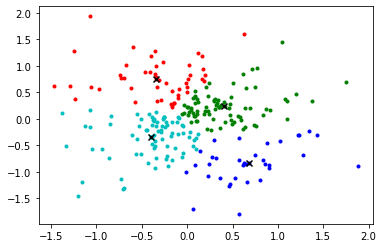

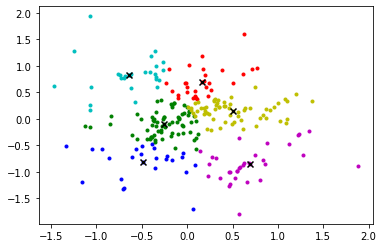

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 2
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

limit1: 0, limit2: 9, cost: inf, costTemp: 1.336859778791839
True
limit1: 1, limit2: 9, cost: 1.336859778791839, costTemp: 1.3319054514679893
True
limit1: 2, limit2: 9, cost: 1.3319054514679893, costTemp: 1.3196939200332314
True
limit1: 3, limit2: 9, cost: 1.3196939200332314, costTemp: 1.3271975504520679
False
limit1: 4, limit2: 9, cost: 1.3196939200332314, costTemp: 1.307421269250596
True
limit1: 5, limit2: 9, cost: 1.307421269250596, costTemp: 1.2848804048907871
True
limit1: 6, limit2: 9, cost: 1.2848804048907871, costTemp: 1.27025567136028
True
limit1: 7, limit2: 9, cost: 1.27025567136028, costTemp: 1.2623674546075736
True
limit1: 8, limit2: 9, cost: 1.2623674546075736, costTemp: 1.2527974890705726
True
limit1: 9, limit2: 9, cost: 1.2527974890705726, costTemp: 1.2477718665972177
True
limit1: 0, limit2: 9, cost: inf, costTemp: 0.9392749364122146
True
limit1: 1, limit2: 9, cost: 0.9392749364122146, costTemp: 0.930856272530222
True
limit1: 2, limit2: 9, cost: 0.930856272530222, costTem

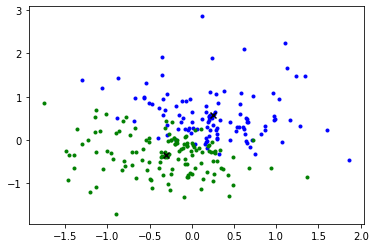

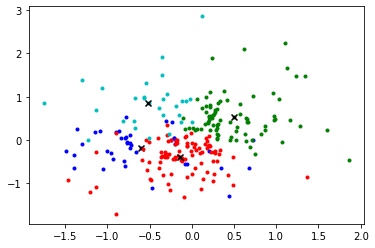

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 4
nrOfCentroids = 2
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])

limit1: 0, limit2: 9, cost: inf, costTemp: 1.0324463714208054
True
limit1: 1, limit2: 9, cost: 1.0324463714208054, costTemp: 1.0099191779688426
True
limit1: 2, limit2: 9, cost: 1.0099191779688426, costTemp: 0.990367816942344
True
limit1: 3, limit2: 9, cost: 0.990367816942344, costTemp: 0.9780098170405649
True
limit1: 4, limit2: 9, cost: 0.9780098170405649, costTemp: 0.9785715454526788
False
limit1: 5, limit2: 9, cost: 0.9780098170405649, costTemp: 0.943943119182989
True
limit1: 6, limit2: 9, cost: 0.943943119182989, costTemp: 0.9427944672248864
True
limit1: 7, limit2: 9, cost: 0.9427944672248864, costTemp: 0.9608961006040845
False
limit1: 8, limit2: 9, cost: 0.9427944672248864, costTemp: 0.930244825264187
True
limit1: 9, limit2: 9, cost: 0.930244825264187, costTemp: 0.9217741243320957
True
limit1: 0, limit2: 9, cost: inf, costTemp: 0.7569012265683288
True
limit1: 1, limit2: 9, cost: 0.7569012265683288, costTemp: 0.7340439359686994
True
limit1: 2, limit2: 9, cost: 0.7340439359686994, co

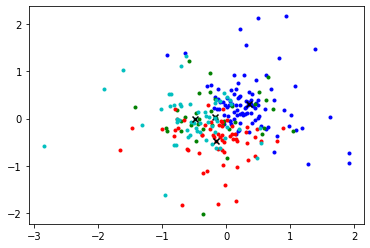

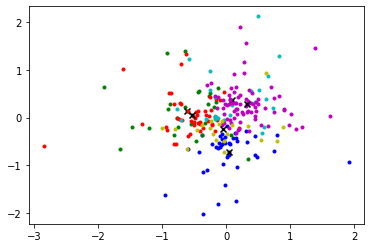

In [ ]:
#wyniki gorsze bo odpalam dla limitów 10,10
nrOfDimensions = 4
nrOfCentroids = 4
points = np.vstack(((np.random.randn(150, nrOfDimensions) * 0.75 ),
                  (np.random.randn(50, nrOfDimensions) * 0.25 ),
                  (np.random.randn(50, nrOfDimensions) * 0.5 )))
km1 = kmeans(points, nrOfCentroids, 10, 10)
nrOfCentroids += 2
km2 = kmeans(points, nrOfCentroids, 10, 10)

print(f'{nrOfDimensions} Wymiary')
print(f'{nrOfCentroids-2} centroidy ', km1[2])
print(f'{nrOfCentroids} centroidy: ', km2[2])